In [69]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [13]:
ten_rand = ten_samp.sample(n= 50000) 

In [16]:
ten_rand.to_csv('ten_rand.csv')

In [17]:
ten_dum = pd.get_dummies(ten_rand, columns = ['EJECTION','AIRBAG_DEPLOYED',
       'SAFETY_EQUIPMENT',
       'MODEL','FIRST_CONTACT_POINT','SEX','AGE','CRASH_HOUR','CRASH_MONTH'])

In [18]:
ten_samp.columns


Index(['EJECTION', 'AIRBAG_DEPLOYED', 'SAFETY_EQUIPMENT', 'MODEL',
       'FIRST_CONTACT_POINT', 'INJURIES_TOTAL', 'SEX', 'AGE', 'CRASH_HOUR',
       'CRASH_MONTH'],
      dtype='object')

In [19]:
ten_rand.columns

Index(['EJECTION', 'AIRBAG_DEPLOYED', 'SAFETY_EQUIPMENT', 'MODEL',
       'FIRST_CONTACT_POINT', 'INJURIES_TOTAL', 'SEX', 'AGE', 'CRASH_HOUR',
       'CRASH_MONTH'],
      dtype='object')

In [29]:
ten_dum.columns

Index(['INJURIES_TOTAL', 'EJECTION_NONE', 'EJECTION_PARTIALLY EJECTED',
       'EJECTION_TOTALLY EJECTED', 'EJECTION_TRAPPED/EXTRICATED',
       'EJECTION_UNKNOWN',
       'AIRBAG_DEPLOYED_DEPLOYED OTHER (KNEE, AIR, BELT, ETC.)',
       'AIRBAG_DEPLOYED_DEPLOYED, COMBINATION',
       'AIRBAG_DEPLOYED_DEPLOYED, FRONT', 'AIRBAG_DEPLOYED_DEPLOYED, SIDE',
       ...
       'CRASH_MONTH_3', 'CRASH_MONTH_4', 'CRASH_MONTH_5', 'CRASH_MONTH_6',
       'CRASH_MONTH_7', 'CRASH_MONTH_8', 'CRASH_MONTH_9', 'CRASH_MONTH_10',
       'CRASH_MONTH_11', 'CRASH_MONTH_12'],
      dtype='object', length=1312)

In [28]:
y = ten_dum['INJURIES_TOTAL']
X = ten_dum.drop(columns = ['INJURIES_TOTAL'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
model = LogisticRegression(n_jobs= -1)
model.fit(X_train,y_train)

samp_pred = model.predict(X_test)
samp_score = model.score(X_test,y_test)

In [30]:
print(samp_score)

0.8474


In [70]:
y = ten_dum['INJURIES_TOTAL']
X = ten_dum.drop(columns = ['INJURIES_TOTAL'])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .2 , random_state = 0)
regressor = RandomForestClassifier(n_estimators = 20,random_state = 0)
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)

In [71]:
random_score = regressor.score(X_test,y_test)
random_score

0.8432

In [72]:
y_test

117920     0.0
1138165    0.0
415412     0.0
382726     0.0
2104423    1.0
          ... 
2411525    0.0
2310329    0.0
2263328    0.0
1249757    1.0
2058707    0.0
Name: INJURIES_TOTAL, Length: 10000, dtype: float64

NameError: name 'svc_disp' is not defined

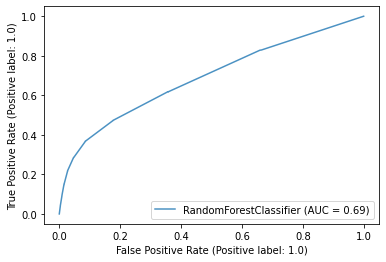

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import train_test_split
rfc = RandomForestClassifier(n_estimators=10, random_state=0)
rfc.fit(X_train, y_train)
ax = plt.gca()
rfc_disp = plot_roc_curve(rfc, X_test, y_test, ax=ax, alpha=0.8)
svc_disp.plot(ax=ax, alpha=0.8)
plt.show()

In [73]:
y_pred

array([0., 0., 0., ..., 1., 1., 0.])

In [74]:
confusion_matrix(y_test,y_pred)

array([[8025,  232],
       [1336,  407]])

In [82]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.1568
Mean Squared Error: 0.1568
Root Mean Squared Error: 0.3959797974644666


In [84]:

# Function to calculate Precision and Recall

def calc_precision_recall(y_true, y_pred):
    
    # Convert predictions to series with index matching y_true
    y_pred = pd.Series(y_pred, index=y_true.index)
    
    # Instantiate counters
    TP = 0
    FP = 0
    FN = 0

    # Determine whether each prediction is TP, FP, TN, or FN
    for i in y_true.index: 
        if y_true[i]==y_pred[i]==1:
           TP += 1
        if y_pred[i]==1 and y_true[i]!=y_pred[i]:
           FP += 1
        if y_pred[i]==0 and y_test[i]!=y_pred[i]:
           FN += 1
    
    # Calculate true positive rate and false positive rate
    # Use try-except statements to avoid problem of dividing by 0
    try:
        precision = TP / (TP + FP)
    except:
        precision = 1
    
    try:
        recall = TP / (TP + FN)
    except:
        recall = 1

    return precision, recall

# Test function

calc_precision_recall(y_test, y_pred)

(0.6369327073552425, 0.23350545037292025)

In [93]:

# Use sklearn to plot precision-recall curves

from sklearn.metrics import plot_precision_recall_curve

plot_precision_recall_curve(lr, X_test, y_test, name = 'Logistic Regression')
plot_precision_recall_curve(lr_l2, X_test, y_test, name = 'L2 Logistic Regression');



NameError: name 'lr' is not defined

In [ ]:
def get_scores(classifier, X_train, X_test, y_train, y_test, **kwargs):
    model = classifier(**kwargs)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    return model.score(X_test, y_test), \
           precision_score(y_test, y_predict), \
           recall_score(y_test, y_predict)

print("\n16. Model, Accuracy, Precision, Recall")
print("    Random Forest:", get_scores(RandomForestClassifier, X_train, X_test, y_train, y_test, n_estimators=25, max_features=5))
print("    Logistic Regression:", get_scores(LogisticRegression, X_train, X_test, y_train, y_test))
print("    Decision Tree:", get_scores(DecisionTreeClassifier, X_train, X_test, y_train, y_test))
print("    Naive Bayes:", get_scores(MultinomialNB, X_train, X_test, y_train, y_test))

In [ ]:
print("17. Use the included `plot_roc` function to visualize the roc curve of each model")
plot_roc(X, y, RandomForestClassifier, 'Random_Forest', n_estimators=25, max_features=5)
plot_roc(X, y, LogisticRegression, 'Logistic_Regression')
plot_roc(X, y, DecisionTreeClassifier, 'Decision_Tree')
#plot_roc(X, y, MultinomialNB, 'Naive_Bayes')